In [8]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib as mpl

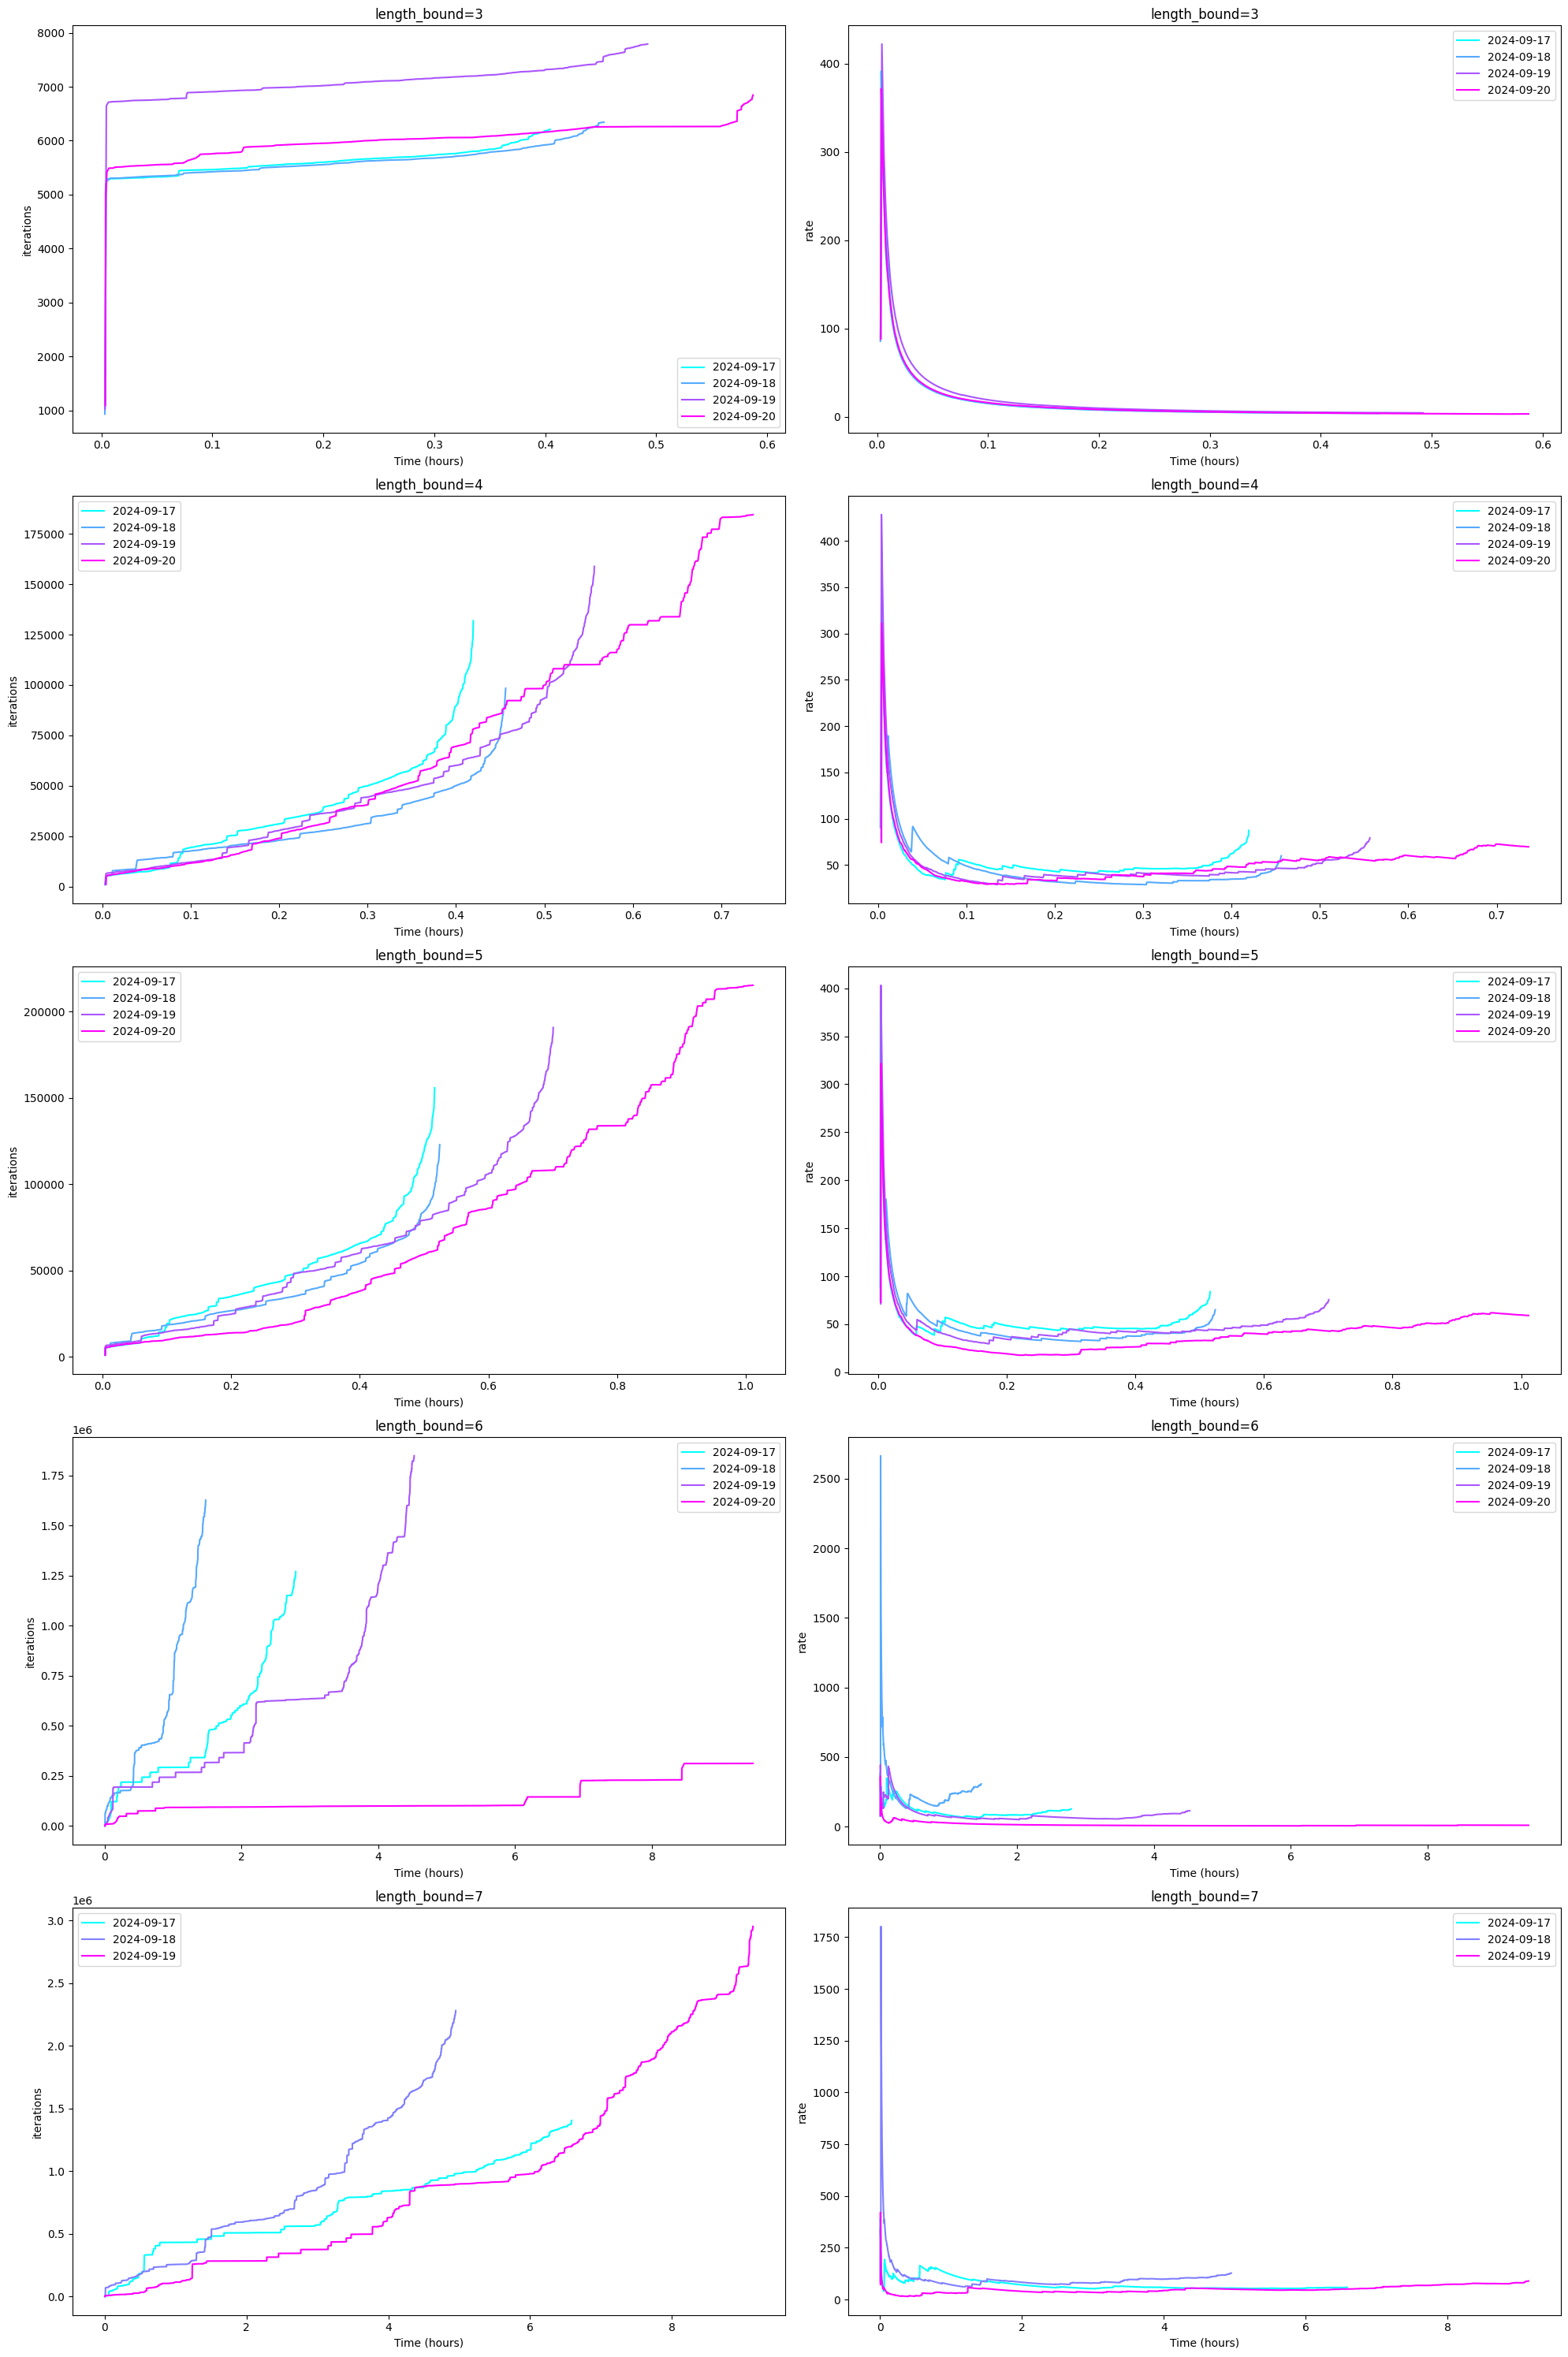

In [9]:
# Plotting the data
logs_directory = Path(f"../16TB/graphs.logs")
length_bounds = sorted(int(directory.name) for directory in logs_directory.iterdir())
columns = ('iterations', 'rate')

fig, axss = plt.subplots(
    nrows=len(length_bounds), ncols=len(columns),
    figsize=(20, len(length_bounds) * 6))

cmap = mpl.colormaps['cool']  # Choose a colormap (e.g., 'viridis')

for length_bound, axs in zip(length_bounds, axss):
    log_paths = sorted((logs_directory / str(length_bound)).iterdir())
    for i, log_path in enumerate(log_paths):
        log_df = pd.read_csv(log_path)
        for column, ax in zip(columns, axs):
            # Plot column vs timestamp
            graph_date = log_path.stem.split("__")[-1]
            color = cmap(i / (len(log_paths) - 1))
            ax.plot(log_df['time_seconds'] / 60 / 60, log_df[column], label=graph_date, color=color)

            # Adding titles and labels
            ax.set_title(f"{length_bound=}")
            ax.set_xlabel('Time (hours)')
            ax.set_ylabel(column)
            ax.legend()

# Display the plot
plt.tight_layout()  # Ensures the subplots do not overlap
plt.show()